# Lag-CRP (Lag-Conditional Response Probability)

Compute lag-conditional response probabilities to quantify temporal contiguity in free recall.

Lag-CRP uses the serial lag between successive recalls, defined as the difference in study positions: 

**lag = position(current item) − position(previous item)**. 

Negative values mean a backward transition, positive values mean a forward transition; 0 is excluded. At each recall step after the first, the available lags are those from the previously recalled item to all not-yet-recalled study positions. For each nonzero lag value, the measure aggregates across trials:

**Lag-CRP(lag) = (number of actual transitions at that lag) / (number of times that lag was available).**

Curves that peak near ±1 (often with a modest forward skew) indicate strong temporal contiguity: a tendency to move between items that were studied near each other in time.

In [1]:
import os
import warnings
from jaxcmr.analyses.crp import plot_crp
from jaxcmr.helpers import find_project_root, generate_trial_mask, load_data
warnings.filterwarnings("ignore")

In [2]:
run_tag = "CRP"
data_name = "LohnasKahana2014"
data_query = "data['list_type'] == 1"

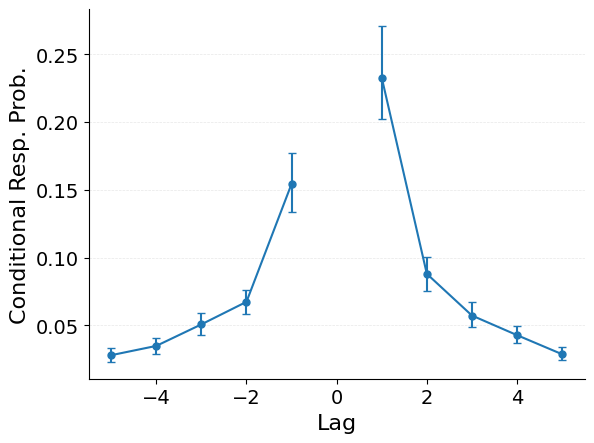

In [3]:
data_path = os.path.join(find_project_root(), "data/LohnasKahana2014.h5")
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

plot_crp(data, trial_mask);